In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BTI
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


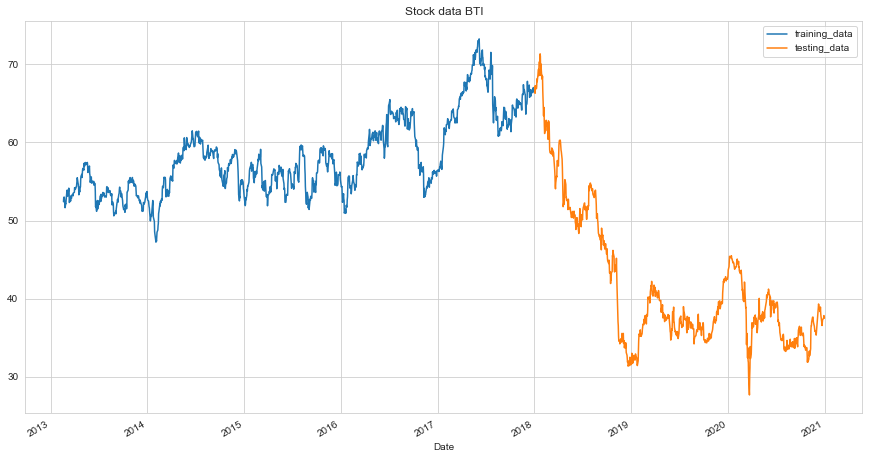

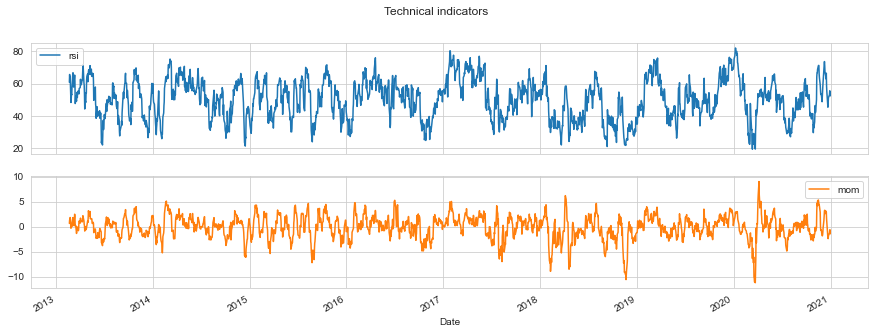

In [2]:
stock_name = 'bti'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1169.80, duration: 0:00:00.203065
episode: 2/2000, episode end value: 1143.29, duration: 0:00:00.191040
episode: 3/2000, episode end value: 1113.93, duration: 0:00:00.199038
episode: 4/2000, episode end value: 1100.29, duration: 0:00:00.198050
episode: 5/2000, episode end value: 1084.91, duration: 0:00:00.173039
episode: 6/2000, episode end value: 1091.43, duration: 0:00:00.186057
episode: 7/2000, episode end value: 1153.38, duration: 0:00:00.209031
episode: 8/2000, episode end value: 1147.94, duration: 0:00:00.205046
episode: 9/2000, episode end value: 1153.83, duration: 0:00:00.207063
episode: 10/2000, episode end value: 1143.36, duration: 0:00:00.218034
episode: 11/2000, episode end value: 1138.96, duration: 0:00:00.235058
episode: 12/2000, episode end value: 1146.72, duration: 0:00:00.221030
episode: 13/2000, episode end value: 1154.98, duration: 0:00:00.208052
episode: 14/2000, episode end value: 1163.83, duration: 0:00:00.211049
episode: 15/200

episode: 117/2000, episode end value: 1165.03, duration: 0:00:00.247061
episode: 118/2000, episode end value: 1141.31, duration: 0:00:00.255058
episode: 119/2000, episode end value: 1147.88, duration: 0:00:00.272059
episode: 120/2000, episode end value: 1158.95, duration: 0:00:00.280077
episode: 121/2000, episode end value: 1130.15, duration: 0:00:00.287064
episode: 122/2000, episode end value: 1139.60, duration: 0:00:00.294065
episode: 123/2000, episode end value: 1139.42, duration: 0:00:00.269064
episode: 124/2000, episode end value: 1156.91, duration: 0:00:00.275061
episode: 125/2000, episode end value: 1148.36, duration: 0:00:00.264061
episode: 126/2000, episode end value: 1144.61, duration: 0:00:00.243053
episode: 127/2000, episode end value: 1134.72, duration: 0:00:00.278063
episode: 128/2000, episode end value: 1141.80, duration: 0:00:00.244054
episode: 129/2000, episode end value: 1144.37, duration: 0:00:00.232051
episode: 130/2000, episode end value: 1172.77, duration: 0:00:00

episode: 231/2000, episode end value: 1161.84, duration: 0:00:00.286061
episode: 232/2000, episode end value: 1127.81, duration: 0:00:00.286062
episode: 233/2000, episode end value: 1170.30, duration: 0:00:00.262061
episode: 234/2000, episode end value: 1137.70, duration: 0:00:00.268058
episode: 235/2000, episode end value: 1147.62, duration: 0:00:00.276065
episode: 236/2000, episode end value: 1167.16, duration: 0:00:00.284059
episode: 237/2000, episode end value: 1135.23, duration: 0:00:00.271062
episode: 238/2000, episode end value: 1145.86, duration: 0:00:00.278062
episode: 239/2000, episode end value: 1135.31, duration: 0:00:00.265062
episode: 240/2000, episode end value: 1135.03, duration: 0:00:00.264059
episode: 241/2000, episode end value: 1141.96, duration: 0:00:00.299063
episode: 242/2000, episode end value: 1147.51, duration: 0:00:00.269065
episode: 243/2000, episode end value: 1149.76, duration: 0:00:00.275076
episode: 244/2000, episode end value: 1143.69, duration: 0:00:00

episode: 345/2000, episode end value: 1167.92, duration: 0:00:00.482111
episode: 346/2000, episode end value: 1147.26, duration: 0:00:00.480108
episode: 347/2000, episode end value: 1138.72, duration: 0:00:00.448100
episode: 348/2000, episode end value: 1138.36, duration: 0:00:00.516116
episode: 349/2000, episode end value: 1134.31, duration: 0:00:00.474108
episode: 350/2000, episode end value: 1142.14, duration: 0:00:00.509118
episode: 351/2000, episode end value: 1145.23, duration: 0:00:00.455103
episode: 352/2000, episode end value: 1135.07, duration: 0:00:00.448098
episode: 353/2000, episode end value: 1143.36, duration: 0:00:00.368084
episode: 354/2000, episode end value: 1163.84, duration: 0:00:00.409092
episode: 355/2000, episode end value: 1144.33, duration: 0:00:00.384086
episode: 356/2000, episode end value: 1140.15, duration: 0:00:00.429098
episode: 357/2000, episode end value: 1155.99, duration: 0:00:00.396096
episode: 358/2000, episode end value: 1136.77, duration: 0:00:00

episode: 459/2000, episode end value: 1147.94, duration: 0:00:00.390088
episode: 460/2000, episode end value: 1142.70, duration: 0:00:00.479108
episode: 461/2000, episode end value: 1145.31, duration: 0:00:00.389088
episode: 462/2000, episode end value: 1150.78, duration: 0:00:00.427099
episode: 463/2000, episode end value: 1147.33, duration: 0:00:00.466099
episode: 464/2000, episode end value: 1139.05, duration: 0:00:00.439097
episode: 465/2000, episode end value: 1132.55, duration: 0:00:00.507113
episode: 466/2000, episode end value: 1143.51, duration: 0:00:00.526120
episode: 467/2000, episode end value: 1144.13, duration: 0:00:00.476108
episode: 468/2000, episode end value: 1141.60, duration: 0:00:00.497112
episode: 469/2000, episode end value: 1148.40, duration: 0:00:00.526119
episode: 470/2000, episode end value: 1133.58, duration: 0:00:00.480106
episode: 471/2000, episode end value: 1146.40, duration: 0:00:00.477106
episode: 472/2000, episode end value: 1145.10, duration: 0:00:00

episode: 573/2000, episode end value: 1158.44, duration: 0:00:00.436098
episode: 574/2000, episode end value: 1139.02, duration: 0:00:00.444096
episode: 575/2000, episode end value: 1139.07, duration: 0:00:00.414095
episode: 576/2000, episode end value: 1181.57, duration: 0:00:00.439099
episode: 577/2000, episode end value: 1127.78, duration: 0:00:00.394088
episode: 578/2000, episode end value: 1147.43, duration: 0:00:00.412093
episode: 579/2000, episode end value: 1144.13, duration: 0:00:00.349078
episode: 580/2000, episode end value: 1147.54, duration: 0:00:00.427097
episode: 581/2000, episode end value: 1175.48, duration: 0:00:00.474104
episode: 582/2000, episode end value: 1155.62, duration: 0:00:00.436096
episode: 583/2000, episode end value: 1139.74, duration: 0:00:00.380087
episode: 584/2000, episode end value: 1141.26, duration: 0:00:00.446101
episode: 585/2000, episode end value: 1164.04, duration: 0:00:00.434099
episode: 586/2000, episode end value: 1158.40, duration: 0:00:00

episode: 687/2000, episode end value: 1135.03, duration: 0:00:00.407093
episode: 688/2000, episode end value: 1133.97, duration: 0:00:00.434099
episode: 689/2000, episode end value: 1133.06, duration: 0:00:00.364085
episode: 690/2000, episode end value: 1133.03, duration: 0:00:00.353078
episode: 691/2000, episode end value: 1136.53, duration: 0:00:00.439100
episode: 692/2000, episode end value: 1136.86, duration: 0:00:00.482107
episode: 693/2000, episode end value: 1132.22, duration: 0:00:00.393090
episode: 694/2000, episode end value: 1169.76, duration: 0:00:00.444098
episode: 695/2000, episode end value: 1142.60, duration: 0:00:00.459104
episode: 696/2000, episode end value: 1133.99, duration: 0:00:00.432095
episode: 697/2000, episode end value: 1131.52, duration: 0:00:00.449102
episode: 698/2000, episode end value: 1133.19, duration: 0:00:00.402089
episode: 699/2000, episode end value: 1133.48, duration: 0:00:00.404090
episode: 700/2000, episode end value: 1136.62, duration: 0:00:00

episode: 801/2000, episode end value: 1134.58, duration: 0:00:00.396088
episode: 802/2000, episode end value: 1134.72, duration: 0:00:00.354083
episode: 803/2000, episode end value: 1145.86, duration: 0:00:00.441097
episode: 804/2000, episode end value: 1134.22, duration: 0:00:00.436099
episode: 805/2000, episode end value: 1147.54, duration: 0:00:00.412091
episode: 806/2000, episode end value: 1142.29, duration: 0:00:00.402088
episode: 807/2000, episode end value: 1130.00, duration: 0:00:00.423099
episode: 808/2000, episode end value: 1136.56, duration: 0:00:00.424100
episode: 809/2000, episode end value: 1144.51, duration: 0:00:00.471106
episode: 810/2000, episode end value: 1131.76, duration: 0:00:00.406091
episode: 811/2000, episode end value: 1140.84, duration: 0:00:00.401091
episode: 812/2000, episode end value: 1155.73, duration: 0:00:00.396088
episode: 813/2000, episode end value: 1141.26, duration: 0:00:00.427096
episode: 814/2000, episode end value: 1137.36, duration: 0:00:00

episode: 915/2000, episode end value: 1128.34, duration: 0:00:00.410086
episode: 916/2000, episode end value: 1145.31, duration: 0:00:00.402096
episode: 917/2000, episode end value: 1142.21, duration: 0:00:00.459102
episode: 918/2000, episode end value: 1131.12, duration: 0:00:00.428095
episode: 919/2000, episode end value: 1138.52, duration: 0:00:00.347079
episode: 920/2000, episode end value: 1135.15, duration: 0:00:00.364082
episode: 921/2000, episode end value: 1165.68, duration: 0:00:00.381086
episode: 922/2000, episode end value: 1132.41, duration: 0:00:00.465109
episode: 923/2000, episode end value: 1134.77, duration: 0:00:00.427101
episode: 924/2000, episode end value: 1128.95, duration: 0:00:00.403086
episode: 925/2000, episode end value: 1136.85, duration: 0:00:00.445101
episode: 926/2000, episode end value: 1141.04, duration: 0:00:00.425095
episode: 927/2000, episode end value: 1131.18, duration: 0:00:00.395092
episode: 928/2000, episode end value: 1138.57, duration: 0:00:00

episode: 1029/2000, episode end value: 1136.42, duration: 0:00:00.373083
episode: 1030/2000, episode end value: 1139.16, duration: 0:00:00.459103
episode: 1031/2000, episode end value: 1133.56, duration: 0:00:00.350083
episode: 1032/2000, episode end value: 1127.09, duration: 0:00:00.367088
episode: 1033/2000, episode end value: 1144.01, duration: 0:00:00.378085
episode: 1034/2000, episode end value: 1143.96, duration: 0:00:00.476106
episode: 1035/2000, episode end value: 1131.02, duration: 0:00:00.416093
episode: 1036/2000, episode end value: 1149.64, duration: 0:00:00.441098
episode: 1037/2000, episode end value: 1155.97, duration: 0:00:00.396091
episode: 1038/2000, episode end value: 1135.09, duration: 0:00:00.409093
episode: 1039/2000, episode end value: 1127.76, duration: 0:00:00.413097
episode: 1040/2000, episode end value: 1147.10, duration: 0:00:00.414088
episode: 1041/2000, episode end value: 1147.95, duration: 0:00:00.373084
episode: 1042/2000, episode end value: 1157.44, dur

episode: 1142/2000, episode end value: 1156.53, duration: 0:00:00.419091
episode: 1143/2000, episode end value: 1137.84, duration: 0:00:00.406092
episode: 1144/2000, episode end value: 1161.84, duration: 0:00:00.349078
episode: 1145/2000, episode end value: 1154.05, duration: 0:00:00.411096
episode: 1146/2000, episode end value: 1162.19, duration: 0:00:00.466104
episode: 1147/2000, episode end value: 1141.81, duration: 0:00:00.441102
episode: 1148/2000, episode end value: 1139.97, duration: 0:00:00.471103
episode: 1149/2000, episode end value: 1145.13, duration: 0:00:00.451106
episode: 1150/2000, episode end value: 1143.98, duration: 0:00:00.423094
episode: 1151/2000, episode end value: 1154.37, duration: 0:00:00.379092
episode: 1152/2000, episode end value: 1143.70, duration: 0:00:00.397091
episode: 1153/2000, episode end value: 1130.90, duration: 0:00:00.454101
episode: 1154/2000, episode end value: 1127.80, duration: 0:00:00.447099
episode: 1155/2000, episode end value: 1146.88, dur

episode: 1255/2000, episode end value: 1129.52, duration: 0:00:00.456102
episode: 1256/2000, episode end value: 1135.35, duration: 0:00:00.452106
episode: 1257/2000, episode end value: 1127.61, duration: 0:00:00.429091
episode: 1258/2000, episode end value: 1133.50, duration: 0:00:00.483111
episode: 1259/2000, episode end value: 1148.84, duration: 0:00:00.470106
episode: 1260/2000, episode end value: 1132.66, duration: 0:00:00.417091
episode: 1261/2000, episode end value: 1150.78, duration: 0:00:00.341078
episode: 1262/2000, episode end value: 1133.02, duration: 0:00:00.378086
episode: 1263/2000, episode end value: 1138.07, duration: 0:00:00.360080
episode: 1264/2000, episode end value: 1125.85, duration: 0:00:00.385087
episode: 1265/2000, episode end value: 1142.93, duration: 0:00:00.442101
episode: 1266/2000, episode end value: 1140.23, duration: 0:00:00.389085
episode: 1267/2000, episode end value: 1127.39, duration: 0:00:00.341076
episode: 1268/2000, episode end value: 1162.99, dur

episode: 1368/2000, episode end value: 1131.05, duration: 0:00:00.381092
episode: 1369/2000, episode end value: 1140.28, duration: 0:00:00.443101
episode: 1370/2000, episode end value: 1138.34, duration: 0:00:00.423098
episode: 1371/2000, episode end value: 1129.76, duration: 0:00:00.413088
episode: 1372/2000, episode end value: 1143.23, duration: 0:00:00.365083
episode: 1373/2000, episode end value: 1127.92, duration: 0:00:00.389086
episode: 1374/2000, episode end value: 1135.52, duration: 0:00:00.430099
episode: 1375/2000, episode end value: 1163.18, duration: 0:00:00.400091
episode: 1376/2000, episode end value: 1147.50, duration: 0:00:00.381088
episode: 1377/2000, episode end value: 1131.72, duration: 0:00:00.456103
episode: 1378/2000, episode end value: 1162.21, duration: 0:00:00.390089
episode: 1379/2000, episode end value: 1150.85, duration: 0:00:00.441103
episode: 1380/2000, episode end value: 1140.60, duration: 0:00:00.462105
episode: 1381/2000, episode end value: 1137.19, dur

episode: 1481/2000, episode end value: 1167.20, duration: 0:00:00.391087
episode: 1482/2000, episode end value: 1138.20, duration: 0:00:00.391085
episode: 1483/2000, episode end value: 1142.17, duration: 0:00:00.368086
episode: 1484/2000, episode end value: 1153.62, duration: 0:00:00.429096
episode: 1485/2000, episode end value: 1129.19, duration: 0:00:00.406089
episode: 1486/2000, episode end value: 1132.40, duration: 0:00:00.420095
episode: 1487/2000, episode end value: 1154.80, duration: 0:00:00.422094
episode: 1488/2000, episode end value: 1146.96, duration: 0:00:00.432101
episode: 1489/2000, episode end value: 1145.77, duration: 0:00:00.381086
episode: 1490/2000, episode end value: 1144.32, duration: 0:00:00.378083
episode: 1491/2000, episode end value: 1180.38, duration: 0:00:00.434096
episode: 1492/2000, episode end value: 1133.02, duration: 0:00:00.388085
episode: 1493/2000, episode end value: 1153.33, duration: 0:00:00.455107
episode: 1494/2000, episode end value: 1160.68, dur

episode: 1594/2000, episode end value: 1139.25, duration: 0:00:00.362084
episode: 1595/2000, episode end value: 1138.92, duration: 0:00:00.403090
episode: 1596/2000, episode end value: 1139.52, duration: 0:00:00.432097
episode: 1597/2000, episode end value: 1164.40, duration: 0:00:00.411091
episode: 1598/2000, episode end value: 1140.70, duration: 0:00:00.361081
episode: 1599/2000, episode end value: 1142.09, duration: 0:00:00.378090
episode: 1600/2000, episode end value: 1132.73, duration: 0:00:00.372081
episode: 1601/2000, episode end value: 1141.23, duration: 0:00:00.418094
episode: 1602/2000, episode end value: 1141.58, duration: 0:00:00.365084
episode: 1603/2000, episode end value: 1136.38, duration: 0:00:00.415092
episode: 1604/2000, episode end value: 1145.49, duration: 0:00:00.368082
episode: 1605/2000, episode end value: 1136.57, duration: 0:00:00.401092
episode: 1606/2000, episode end value: 1135.68, duration: 0:00:00.419097
episode: 1607/2000, episode end value: 1126.90, dur

episode: 1707/2000, episode end value: 1179.41, duration: 0:00:00.427103
episode: 1708/2000, episode end value: 1145.05, duration: 0:00:00.432100
episode: 1709/2000, episode end value: 1161.67, duration: 0:00:00.409089
episode: 1710/2000, episode end value: 1135.68, duration: 0:00:00.412092
episode: 1711/2000, episode end value: 1130.71, duration: 0:00:00.422094
episode: 1712/2000, episode end value: 1171.98, duration: 0:00:00.509115
episode: 1713/2000, episode end value: 1165.93, duration: 0:00:00.449100
episode: 1714/2000, episode end value: 1136.76, duration: 0:00:00.434100
episode: 1715/2000, episode end value: 1145.04, duration: 0:00:00.384083
episode: 1716/2000, episode end value: 1138.18, duration: 0:00:00.437098
episode: 1717/2000, episode end value: 1176.01, duration: 0:00:00.408098
episode: 1718/2000, episode end value: 1133.29, duration: 0:00:00.423096
episode: 1719/2000, episode end value: 1133.52, duration: 0:00:00.449103
episode: 1720/2000, episode end value: 1131.29, dur

episode: 1820/2000, episode end value: 1162.73, duration: 0:00:00.433097
episode: 1821/2000, episode end value: 1148.27, duration: 0:00:00.380085
episode: 1822/2000, episode end value: 1125.30, duration: 0:00:00.354081
episode: 1823/2000, episode end value: 1156.79, duration: 0:00:00.388089
episode: 1824/2000, episode end value: 1139.39, duration: 0:00:00.403091
episode: 1825/2000, episode end value: 1137.81, duration: 0:00:00.434097
episode: 1826/2000, episode end value: 1161.63, duration: 0:00:00.328078
episode: 1827/2000, episode end value: 1152.15, duration: 0:00:00.386085
episode: 1828/2000, episode end value: 1136.38, duration: 0:00:00.376091
episode: 1829/2000, episode end value: 1131.01, duration: 0:00:00.353080
episode: 1830/2000, episode end value: 1142.14, duration: 0:00:00.317070
episode: 1831/2000, episode end value: 1129.97, duration: 0:00:00.320068
episode: 1832/2000, episode end value: 1143.27, duration: 0:00:00.353086
episode: 1833/2000, episode end value: 1136.11, dur

episode: 1933/2000, episode end value: 1136.63, duration: 0:00:00.432095
episode: 1934/2000, episode end value: 1149.80, duration: 0:00:00.400089
episode: 1935/2000, episode end value: 1133.06, duration: 0:00:00.432092
episode: 1936/2000, episode end value: 1147.79, duration: 0:00:00.429100
episode: 1937/2000, episode end value: 1141.28, duration: 0:00:00.418094
episode: 1938/2000, episode end value: 1132.04, duration: 0:00:00.396090
episode: 1939/2000, episode end value: 1136.63, duration: 0:00:00.412094
episode: 1940/2000, episode end value: 1142.04, duration: 0:00:00.369082
episode: 1941/2000, episode end value: 1135.11, duration: 0:00:00.402088
episode: 1942/2000, episode end value: 1127.58, duration: 0:00:00.334074
episode: 1943/2000, episode end value: 1157.14, duration: 0:00:00.335076
episode: 1944/2000, episode end value: 1143.23, duration: 0:00:00.376085
episode: 1945/2000, episode end value: 1134.00, duration: 0:00:00.381088
episode: 1946/2000, episode end value: 1131.07, dur

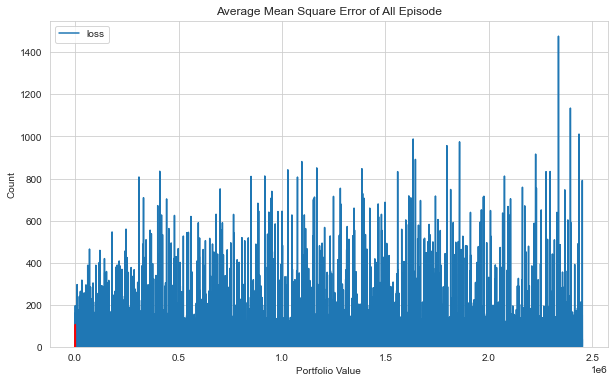

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

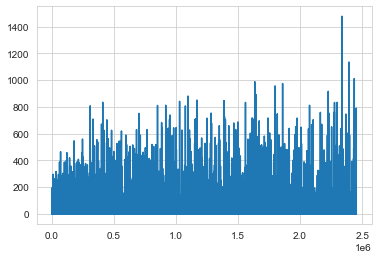

In [5]:
plt.plot(agent.model.losses)

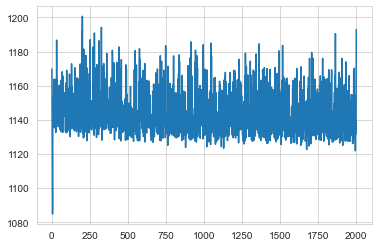

In [6]:
plt.plot(portfolio_value)

episode end value: 887.97, duration: 0:00:00.172040
Sell: 327 times, Buy: 329 times


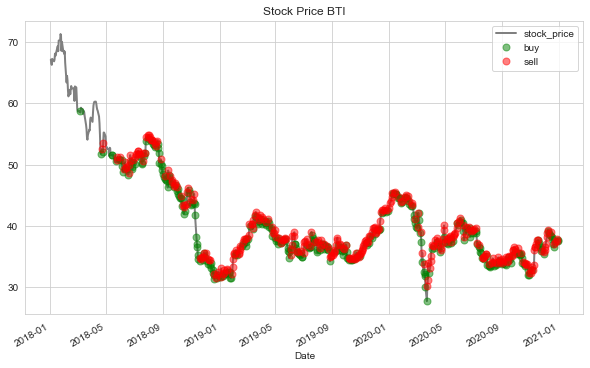

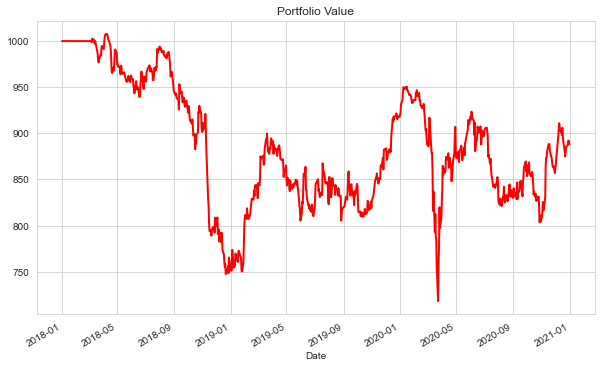

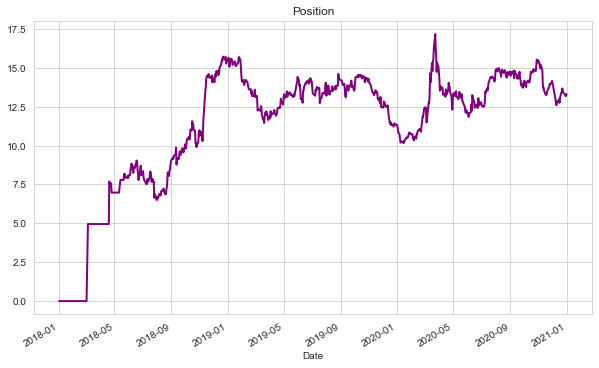

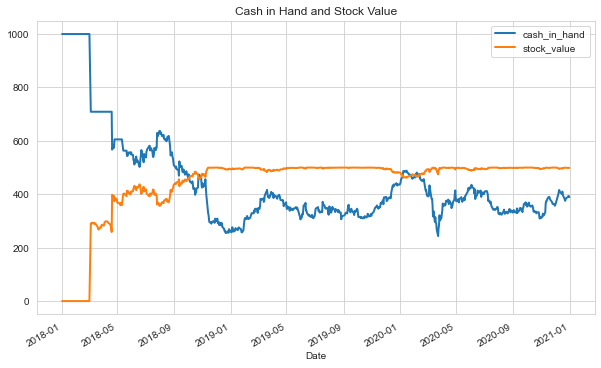

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BTI
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -3.88 %
Volatility: 0.1700
shape ratio: -0.2931
Maximun drawdown: -28.73 %
Calmar ratio: -0.1351
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -17.67 %
Volatility (benchmark): 0.3061
shape ratio: -0.6133
Maximun drawdown: -61.27 %
Calmar ratio (benchmark): -0.2884


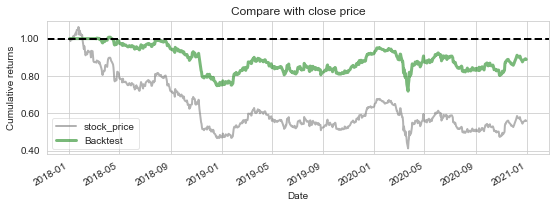

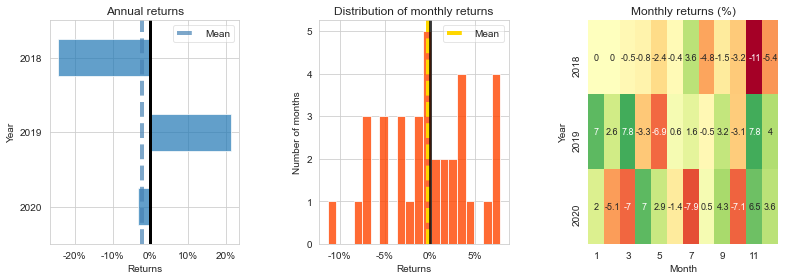

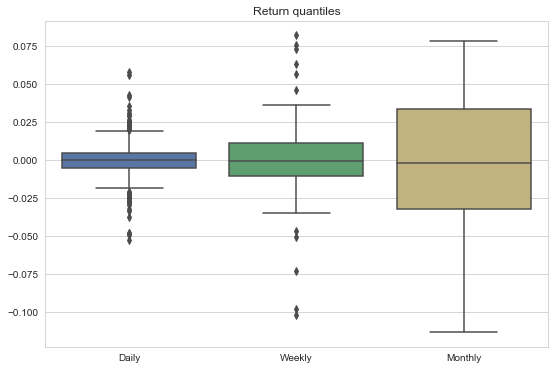

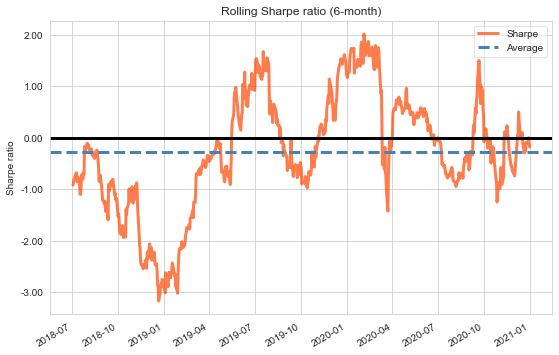

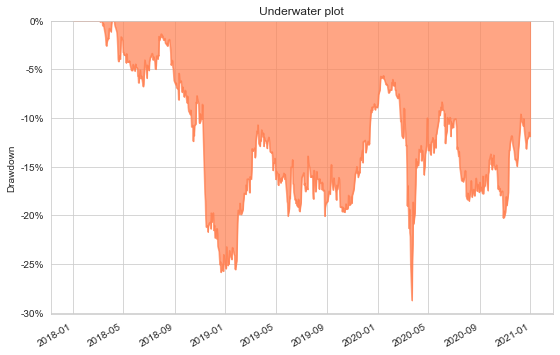

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')